C:\Users\omend\AppData\Local\Temp\ipykernel_8244\4134175318.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_latest, x='Country Name', y='Population', ax=axs[0, 0], palette='crest')


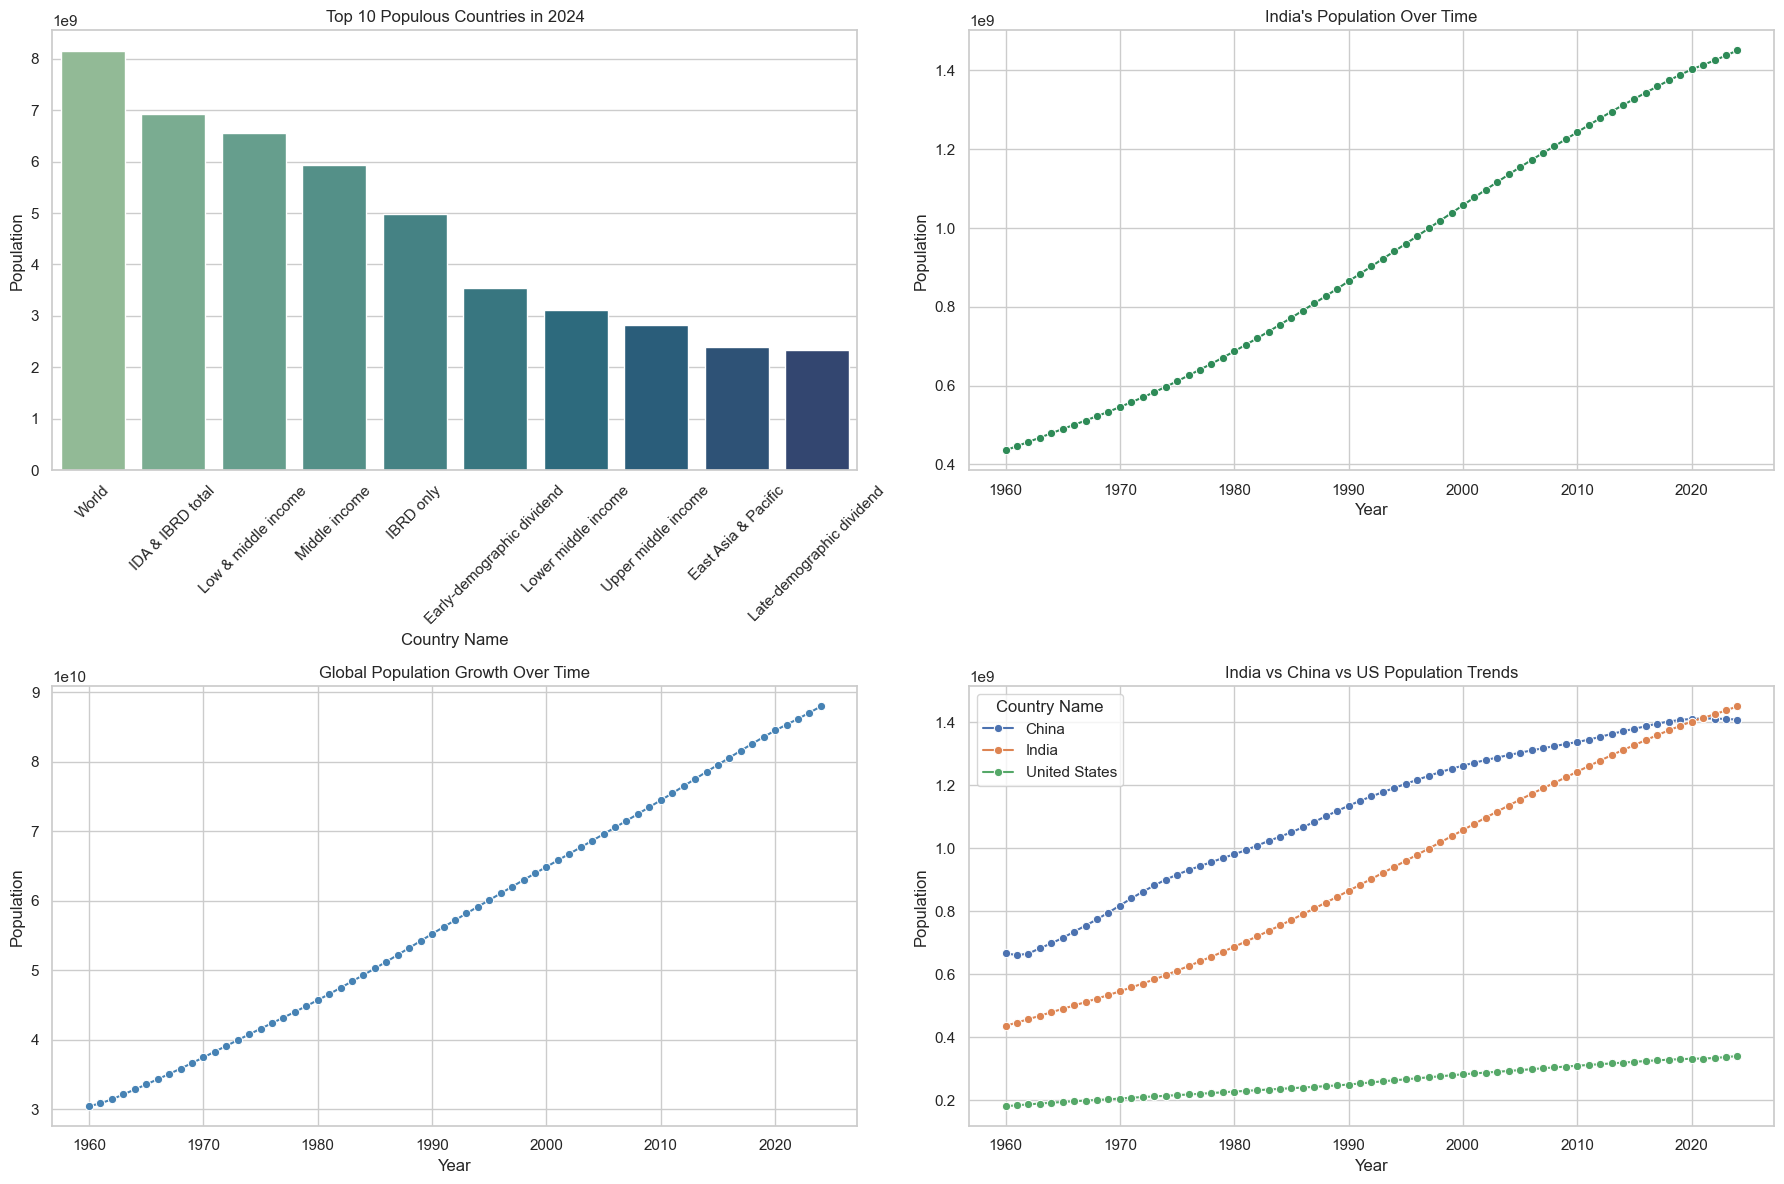

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset and skip metadata rows
df = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv", skiprows=4)

# Step 2: Drop unnecessary columns if they exist
drop_cols = ['Indicator Name', 'Indicator Code']
for col in drop_cols:
    if col in df.columns:
        df.drop(columns=col, inplace=True)

# Step 3: Convert wide format to long format
df_long = df.melt(id_vars=["Country Name", "Country Code"], 
                  var_name="Year", value_name="Population")

# Step 4: Clean the Year and Population columns
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
df_long.dropna(subset=['Population'], inplace=True)

# Step 5: Convert Population to numeric
df_long['Population'] = pd.to_numeric(df_long['Population'], errors='coerce')
df_long.dropna(subset=['Population'], inplace=True)

# Step 6: Analysis DataFrames
latest_year = df_long['Year'].max()
top10_latest = df_long[df_long['Year'] == latest_year].nlargest(10, 'Population')
india_trend = df_long[df_long['Country Name'] == 'India']
global_trend = df_long.groupby('Year')['Population'].sum().reset_index()
countries_compare = df_long[df_long['Country Name'].isin(['India', 'China', 'United States'])]

# Step 7: Plotting
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Top 10 Populous Countries in Latest Year
sns.barplot(data=top10_latest, x='Country Name', y='Population', ax=axs[0, 0], palette='crest')
axs[0, 0].set_title(f"Top 10 Populous Countries in {int(latest_year)}")
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: India's Population Trend
sns.lineplot(data=india_trend, x='Year', y='Population', ax=axs[0, 1], marker='o', color='seagreen')
axs[0, 1].set_title("India's Population Over Time")

# Plot 3: Global Population Growth
sns.lineplot(data=global_trend, x='Year', y='Population', ax=axs[1, 0], marker='o', color='steelblue')
axs[1, 0].set_title("Global Population Growth Over Time")

# Plot 4: India vs China vs US Comparison
sns.lineplot(data=countries_compare, x='Year', y='Population', hue='Country Name', ax=axs[1, 1], marker='o')
axs[1, 1].set_title("India vs China vs US Population Trends")

# Final layout adjustments
plt.tight_layout()
plt.show()
